### 복습

In [ ]:
Bag-of-Word; independent 를 항상 가정함. LM과 반대되는 모델. 각 단어의 출현 확률은 모두 독립(기본가정)
       -> 그러나 실제 단어들에는 dependency 가 존재함에도 무시함. 이를 보완하기 위한 improved BoW
improved BoW; Local Dependency를 캡쳐링하기 위해 N-gram 사용. O(V^n) -> complexity 가 높아짐.
문서를 Bag-of-Word 로 표현한다는 것.

Relevance(doc, query); 연관성의 정도 = Relevance(Rep(d), Rep(q)) -> 어떻게 측정?

Vectorspace model => Relevance 를 Similarity 로 정의. 이 모델에서는 Relevance을 Similarity로 정의하기로 한 것.
그렇게 되면, Similarity(Rep(d), Rep(q)) =>  이를 측정하기 위해서 distacne(유클리디안) 혹은 angle(코사인)을 사용
그러면 벡터 공간 상에서 이들을 표현하기 위해 필요한 것들이 있음.
바로 Dimension, Vector elements -> 어떻게 만들까?
Dimension = Concept => orthogonal한 특징을 살려서 BoW 로 표현. BoW에 독립이라는 가정이 있기 때문에 서로 부합하기 때문에 가능
            -> 이 때 vector 로 Doc이나 Query가 표현될 텐데, Vector elements 이걸 importance 로 표현하자고 얘기함.
    
그러면 각 dimension 에서 importance 어떻게 측정? -> weight 로 측정 -> 지프의 법칙(TF-IDF)
-------------------------------------------------------------------------------------------이론적 측면

실제 구현
C = {d1,d2,...,dn}
V = {t1,t2,...,tm}   -> Dimension(Independent) => 이 때 t 들을 독립 가정에 맞는 BoW로 표현한 것. 가정이 일맥상통하는 것
d1 = {w1,w2,...,wt ㅌ V} -> Vector(Rep(d))
q = {w1,w2,...,wt ㅌ V} -> Req(q); 벡터공간에서 이렇게 표현할 때 문제가 있음
                            -> Query 에서는 t 가 많아야 3-4개. 즉 단어가 몇 개 없음. 그러나 똑같은 벡터 공간 상의 표상이 되어야 함.
                            -> 따라서 Sparse 한 문제가 존재할 수 있음(sparse matrix). 벡터가 v 개 있기 때문에
                            -> 이 문제점 해결을 위해 NN-based Embedding

DTM(Doc.-Term Matrix) (N,M); Space, Time complexity 문제가 있음. -> 병목현상. 메모리에 충분히 올리지 못함(in-memory 작업 x)
                                       -> Q*N*M 수행시간; 몇 억단위가 넘어가면 시간이 엄청 오래걸림
TDM(Term-Doc Matrix)  (M,N); Inverted-index(역색인 구조. 단어에 문서가 포함된 형태로 바꿔준 것.)
                           => Time complexity 해결함. (Q*T)
Inverted-index; 효율적으로 표현하고 공간 줄이고 시간 활용하도록 Dictionary - Posting 로 구분함.
          => Dictionary(Hashable); 빠르게 액세스 가능. In-memory => key: Term, Value: posting 위치값
             Posting(Huge); on-disc.  tuple 의 형태, linked list; (docID, freq, next) -> () -> () -> Linked List
Linked List: dict(키,밸류 쌍 있어서 주소 기억할 필요 없음) -> list(index로 위치를 가지고 linked list 처럼 이해) 과정을 봤음.
    오늘은 이것을 file로.
어떤 식으로 작업?
[for d in C: localPosting(d);]-> 문서마다 일어남. 즉 map(): {k;v} 
    globalUpadating(); 이것은 reduce(0: {k:sum(v)}) => GFS, Hadoop

In [ ]:
# struct 를 이용한 pack, unpack 으로 바이트 형태로 파일을 올려서 가중치까지 매기는 것 까지 해보자.

### 수업

In [ ]:
# struct 를 이용한 pack, unpack 으로 바이트 형태로 파일을 올려서 가중치까지 매기는 것 까지 해보자.

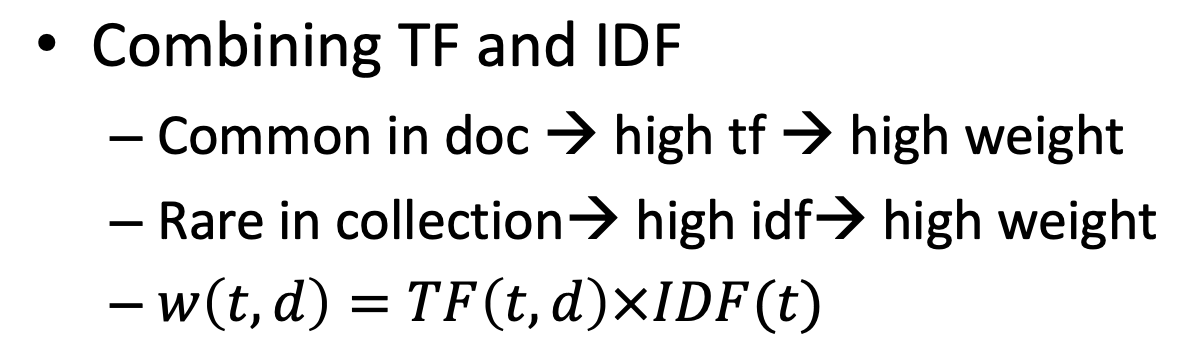

In [ ]:
TF-IDF의 여러가지 변형들을 보자
weight 라는 이름으로 여러가지에서 사용한다. -> tf-idf 는 한가지 종류가 아니다!
TF-IDF(Term Frequency - Inverse Document Frequency)는 정보 검색과 텍스트 마이닝에서 이용하는 가중치로,
여러 문서로 이루어진 문서군이 있을 때 어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지를 나타내는 통계적 수치이다. 문서의 핵심어를 추출하거나,
검색 엔진에서 검색 결과의 순위를 결정하거나, 문서들 사이의 비슷한 정도를 구하는 등의 용도로 사용할 수 있다.

In [ ]:
지프의 법칙; Most common(고빈도-흔해서 중요하지 않음), Rare(저빈도-중요하지 않음.)
-> 나머지가 중요. 실제 90% wasted. 나머지가 의미를 전달하는 영역
그 10%를 어떻게 계산? -> ratio를 가지고 자르면 됨. 아니면 rank=inversely frequency. => threshold 우리가 직접 결정해야 함.
이를 결정하기 위해 또다른 실험이 필요함. 그러지 말고 통합된 것이 바로,

TF-IDF: Term freq. - Inversed Doc. Freq.
        -> 고빈도          -> 저빈도
importance 를 weight로 정의했기 때문에 이를 구하는 법을 보는 것.
TF(t)*IDF(t) = weight(t) -> vector space 에서 dimension 의 weight(각 축의 단위) 로 삼자는 것.
Vector Space: 항상 Dimension 을 먼저 봐야함. 그리고 Dimension 의 Importance => 이후 measure(dist, angle 결정 가능)

TF: 고빈도 단어에 더 많은 가중치 => 저빈도 단어에는 가중치 주지 말자는 것.
IDF: 저빈도 단어에 더 많은 가중치 => 고빈도 단어에는 가중치 주지 말자는 것.

| *                 +
|  *               +
|   *             +
|    *           +
|     *         +      
|      *       +
|+++**++*+*+*+*+*+***** 0
|(------)-----(-------)
   TF            IDF
TF 나 IDF 중 한 개가 아무리 높아도 반대(TF-IDF, IDF-TF) 때문에 0에 수렴
그래서 가운데 영역만 남음.
그러면 지프의 법칙으로 자연스럽게 가중치를 가지고 고빈도와 저빈도를 잘라낼 수 있음.

TF-IDF => Weight, Importance(Dimension에서의) => Term(lexicon)들간의 중요한/덜 중요한을 판단할 수 있음

In [ ]:
Zipfs law: Most common(고빈도 X), Rare(저빈도 X), 90% wasted
10%? -> ratio, rank=inversely freqeuncy, => threshold?
TF-IDF: Term freq. - Inversed Doc. Freq.
        => 고빈도      => 저빈도
        TF(t)*IDF(t) => weight(t)
Vector Space: Dimension, Importance => measure(dist. angle)
TF : 고빈도 단어 더 많은 가중치, 저빈도 단어에는 가중치 X
IDF: 저빈도 단어 더 많은 가중치, 고빈도 단어에는 가중치 X
|*       중       +
| *      요      +
|  *           +
|   *         +
|+++**+*+*+*+*+*  0
|(----)----(------)
   TF        IDF
TF-IDF => Weight, Importance => Term(중요한/덜중요한)

In [ ]:
# In information retrieval, tf–idf (also TF*IDF, TFIDF, TF–IDF, or Tf–idf), 
# short for term frequency–inverse document frequency, is a numerical statistic
# that is intended to reflect "how important a word is to a document in a collection or corpus"

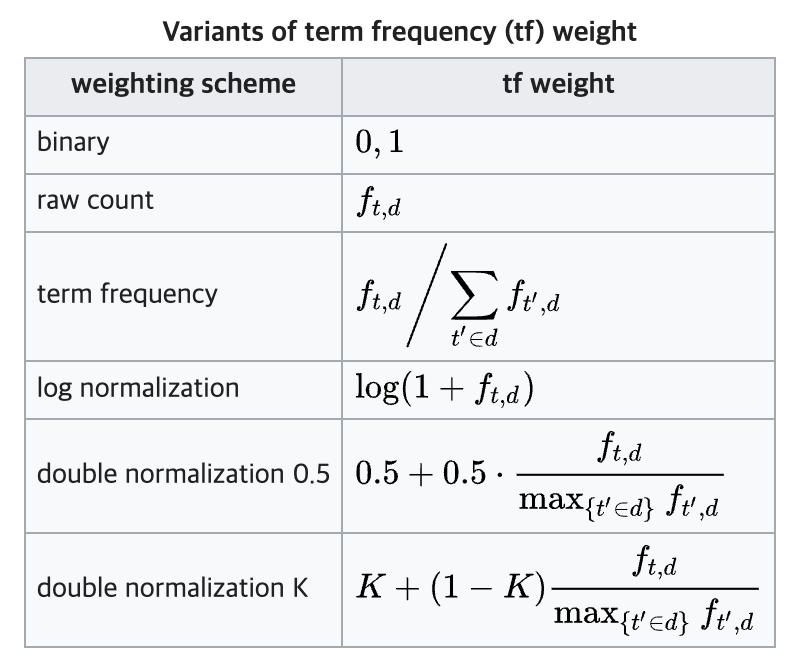

In [ ]:
Q = 'A B C A-'
Q = 'A:2, B:1, C:1'
     1    .5    .5
    -> 값의 gap 이 커짐
    -> 이를 보정하기 위해 특정 k 값을 더하는 것
           .75  .75  -> 문서의 길이 등에 따라서 조절하기 위해 k가 있는 것.

In [1]:
from math import log
# 값의 차이를 벌리고 싶다면 e
# 값의 차이를 줄이고 싶다면 상용로그

In [4]:
# 위 식에 따라 정의해보자
V = list()
tf1 = lambda freq: 1 if freq >0 else 0    # binary
tf2 = lambda freq: freq                   # raw count
tf3 = lambda freq, sumfreq: freq/sumfreq  # term freq
tf4 = lambda freq: log(1+freq, 10)            # log normalization
tf5 = lambda freq, maxfreq: tf6(.5,freq,maxfreq)           # double normalization .5
tf6 = lambda k, freq, maxfreq: k + (1-k) * (freq/maxfreq)  # double normalization K

In [5]:
freq = list(range(1,11))
sumfreq = sum(freq)
maxfreq = max(freq)
freq, sumfreq, maxfreq

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 55, 10)

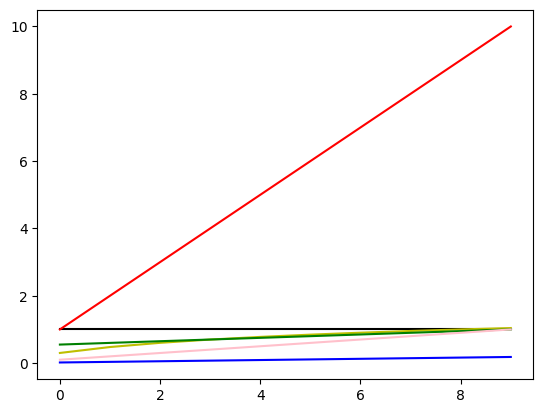

In [7]:
import matplotlib.pyplot as plt

# y축이 빈도

plt.plot([tf1(f) for f in freq], 'k')
plt.plot([tf2(f) for f in freq], 'r')
plt.plot([tf3(f, sumfreq) for f in freq], 'b')
plt.plot([tf4(f) for f in freq], 'y')
plt.plot([tf5(f,maxfreq) for f in freq], 'g')
plt.plot([tf6(0,f,maxfreq) for f in freq], 'pink')

In [11]:
freq, freq[::-1]

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

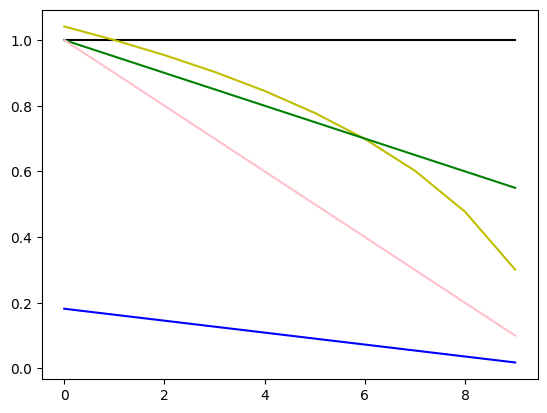

In [9]:
# 고빈도를 더 잘 보기 위해서 뒤집어보자. 고빈도에 가중치 주는 게 TF
freq = list(range(1,11))
sumfreq = sum(freq)
maxfreq = max(freq)

plt.plot([tf1(f) for f in freq[::-1]], 'k')
#plt.plot([tf2(f) for f in freq[::-1]], 'r')
plt.plot([tf3(f, sumfreq) for f in freq[::-1]], 'b')   # sum = 1
plt.plot([tf4(f) for f in freq[::-1]], 'y')
plt.plot([tf5(f,maxfreq) for f in freq[::-1]], 'g')
plt.plot([tf6(0,f,maxfreq) for f in freq[::-1]], 'pink')

In [ ]:
# 이제 idf 를 보자

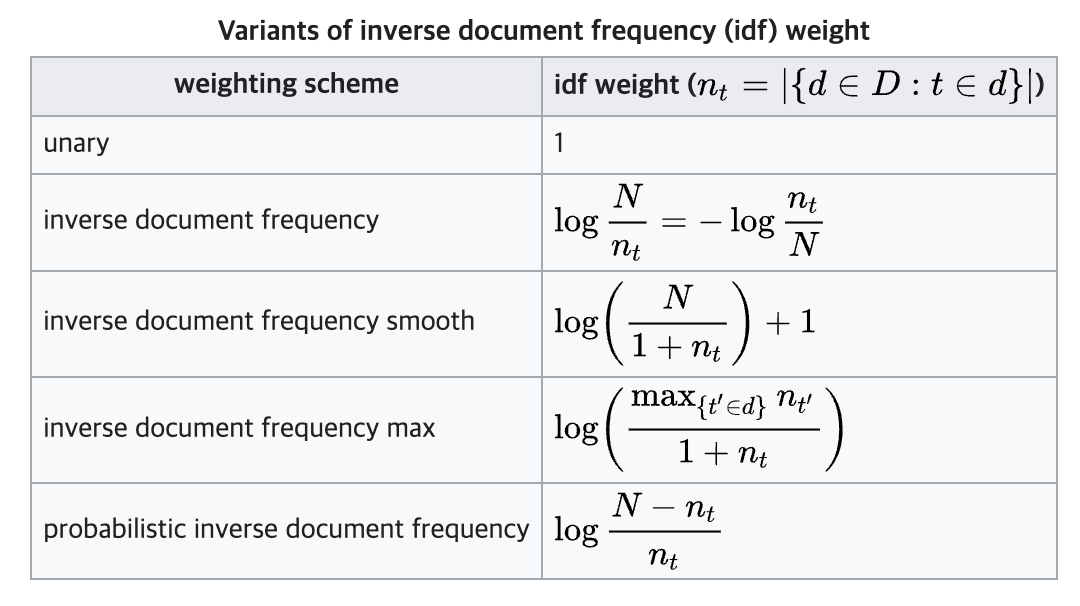

In [ ]:
# 마지막 probabilistic inverse document frequency는 - 값도 나올 수 있음.
# BoW 를 기반으로 해서 Term 들로 dimension 을 삼았는데 그 term dimension 의 weight 에 - 값이 생긴다는 것
# 그러나 단어나 문서는 있는 애들 가지고 ad hoc 기반으로 돌리기 때문에 값이 0일 순 있어도 -일수는 없음.
# 그래서 IR 분야는 기본적으로 1사분면에서 처리함.
# 그런데 마지막 식은 -값을 가지기 때문에 원점을 기준으로 해서 3사분면으로도 됨. => 해석할 때 극성(나랑 반대)인 케이스로 해석해야 함.

In [12]:
# n_t 가 df
# n_t = |tㅌD, dㅌC| => df
idf1 = lambda:1
idf2 = lambda df, N:log(N/df) 
idf3 = lambda df, N:log(N/(1+df))+1
idf4 = lambda df, maxdf:log(maxdf/(1+df))
idf5 = lambda df, N:log((N-df)/df)

In [13]:
# idf 는 Rare 한 순으로
docfreq = list(i*10 for i in range(1,10))
N = 100
maxdf = max(docfreq)

In [14]:
docfreq, N, maxdf

([10, 20, 30, 40, 50, 60, 70, 80, 90], 100, 90)

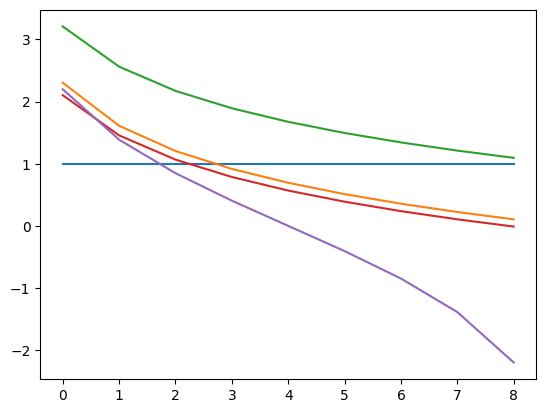

In [15]:
plt.plot([idf1() for df in docfreq])
plt.plot([idf2(df, N) for df in docfreq])
plt.plot([idf3(df, N) for df in docfreq])
plt.plot([idf4(df, maxdf) for df in docfreq])
plt.plot([idf5(df, N) for df in docfreq])

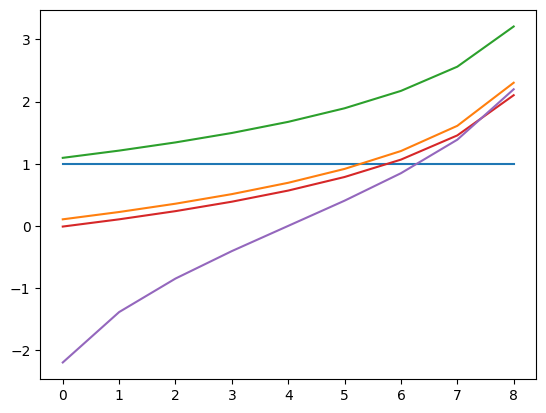

In [34]:
# 뒤로 갈수록 올라감. 저빈도에 가중치 주는 게 IDF
# 왜냐면 모든 문서마다 흔한 것 보다는 적은 문서에서 나온 단어가 의미가 있을 것이기 때문에
plt.plot([idf1() for df in docfreq[::-1]])
plt.plot([idf2(df, N) for df in docfreq[::-1]])
plt.plot([idf3(df, N) for df in docfreq[::-1]])
plt.plot([idf4(df, maxdf) for df in docfreq[::-1]])
plt.plot([idf5(df, N) for df in docfreq[::-1]])

In [ ]:
# tf 그래프와 idf 그래프를 합칠 거니까 가운데 영역만 나올 것

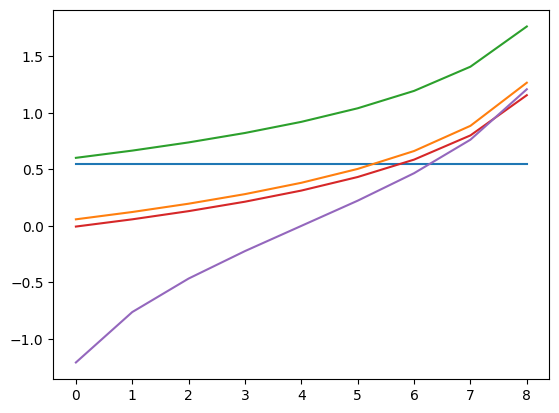

In [16]:
plt.plot([tf5(freq[0],maxfreq)*idf1() for df in docfreq[::-1]])
plt.plot([tf5(freq[0],maxfreq)*idf2(df, N) for df in docfreq[::-1]])
plt.plot([tf5(freq[0],maxfreq)*idf3(df, N) for df in docfreq[::-1]])
plt.plot([tf5(freq[0],maxfreq)*idf4(df, maxdf) for df in docfreq[::-1]])
plt.plot([tf5(freq[0],maxfreq)*idf5(df, N) for df in docfreq[::-1]])
# tf 가 낮음에도 불구하고 저빈도일수록 가중치가 올라감.
# 빈도에서 낮은 것을 썼기 때문에 tf 는 낮을 것. 

In [ ]:
# 위 그래프 설명
# 0에서 0.5 사이에 고빈도가 포진되어 있음.

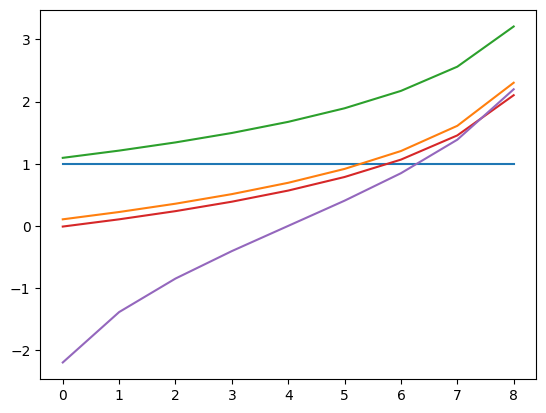

In [17]:
plt.plot([tf5(freq[-1],maxfreq)*idf1() for df in docfreq[::-1]])
plt.plot([tf5(freq[-1],maxfreq)*idf2(df, N) for df in docfreq[::-1]])
plt.plot([tf5(freq[-1],maxfreq)*idf3(df, N) for df in docfreq[::-1]])
plt.plot([tf5(freq[-1],maxfreq)*idf4(df, maxdf) for df in docfreq[::-1]])
plt.plot([tf5(freq[-1],maxfreq)*idf5(df, N) for df in docfreq[::-1]])

# tf가 높은 애

In [ ]:
# 얘는 0에서 1 사이에 고빈도가 포진되어 있음
# tf가 높은 애들일 수록 값을 많이 받음. 

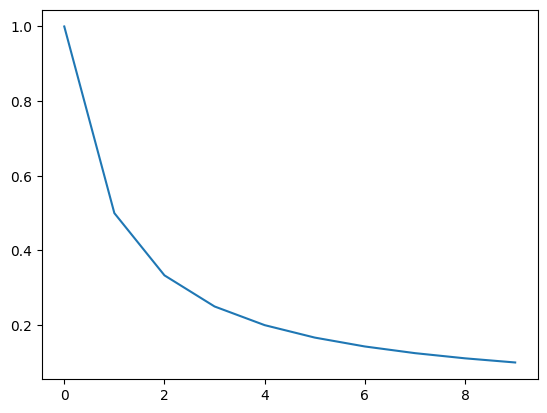

In [39]:
plt.plot([1/f for f in freq])

In [ ]:
# 같은 idf 조건일 때는 tf 가 높은 애들이 높은 가중치를 받음.
# 같은 tf 조건일 때는 idf 가 높은 애들이 높은 가중치를 받음.
# 이런 게 쌓이면 가운데 애들만 볼록 튀어나오게 됨.

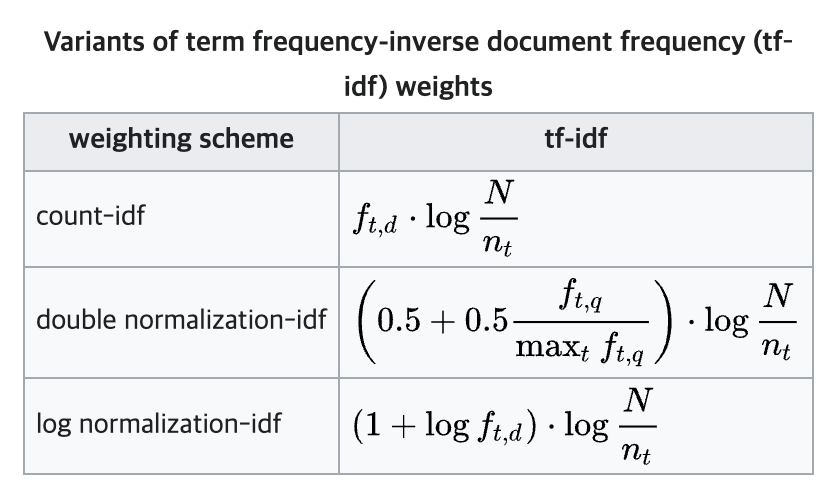

In [ ]:
# 이 표에서 가운데 거를 제일 많이 쓸 것

In [ ]:
# TFIDF = tf5 * idf2  즉 double normalization-idf

In [ ]:
# weight(t,d) = tf(t,d)*idf(t)
#             = K + (1-K)(freq(t,d)/maxfreq(t,d)) * log(N/df(t))
#                        tf                            idf
        
# K 가 하이퍼 파라미터
# 일반적으로 K=0, 글이 짧으면 K = .5
freq(t,d)  # 특정 doc 에서 특정 term 의 빈도
maxfreq(t,d)
N
df(t)

# 이것들이 필요함

In [ ]:
Dictionary                Posting
term:위치                  (doc, freq, next위치), (doc, freq, next위치), ...
                             freq(t,d)
maxfreq(t,d): doc 별로 모든 term 중 max  => 얘만 별도로 저장해 놓으면 됨. 나머지는 다 구해져 있음.
N: 전체 데이터 셋 Collection 의 개수
df(t): Posting 을 몇번 돌았는지 세보면 알 수 있음. (doc, freq, next위치) 를 3번 돌면 df(t)는 3

In [ ]:
C = [0:파일이름,1,2,...]   # 어제는 D 였음. 이제는 Collection
V = [0:토큰,1,2,...]
TDM = {0:위치, 1:위치,...}  # global
Posting = [(문서,빈도,위치), (문서,빈도,위치), ...]

이걸 아래 처럼 바꿀 것. maxfreq 추가

C = [0:{파일이름, maxfreq},1,2,...]
V = [0:토큰,1,2,...]
TDM = {0:위치, 1:위치,...}  # local -> global merge ; 문서 하나마다 Map 하고 Reduce
Posting = [(문서,빈도,위치), (문서,빈도,위치), ...] => 어제는 리스트. 이제는 File

In [18]:
from konlpy.corpus import kobill
from collections import Counter
from struct import pack, unpack

In [46]:
C = list()
V = list()
TDM = dict()   # in-memory
# localTDM = dict()  # doc마다 관리
# Posting = FIle # on-disc 전체 단어, 전체 문서
# localPosting  # 한 문서에서 나온 값들을 기록

# 1. Collection
for file in kobill.fileids():
    C.append({'path':file, 'maxfreq':0})  # C ; list 안에 dict 로 path 와 maxfreq 관리
    
# 2. each Documnet => 분산처리
for d in C:
    i = C.index(d)
    localTDM = Counter(kobill.open(d['path']).read().split())  # 아직 전처리는 안하고 쓸 것. Counter 객체로 빈도 관리
    # {t1 ㅌ d1 : freq, t2 ㅌ d2 : freq, ...}
    C[i]['maxfreq'] = max(localTDM.values())  # 해당 문서에서 최대 빈도 가진 것. TF 계산 위해서
    
    # 3. Local -> Global Merge
#    open('posting.dat', 'xb').close()  # 새 파일이 생김. 뒤에서 append 모드로 열것이기 때문에 빈 파일을 매번 생성
    for t,f in localTDM.items(): # t = t1, f = freq
        if t in TDM.keys():  # 기존에 다른 문서에서 한 번 이상 t가 나온 적 있는 경우. TDM 은 global 이기 때문에
            info = (i,f,TDM[t])   # info = (문서번호, 빈도, 문서위치)

        else:  # 처음 t가 나온 경우
            info = (i,f,-1)  # 처음 나왔으니까 포인터 위치가 -1 => 이후 t가 TDM에 들어있으면 계속 위치 갱신.
            # 즉 처음 t가 나왔을 경우 만들어진 그 info가 그 t가 검색되었을 때 맨 마지막으로 탐색되는 info임
            
            
        fp = open('posting.dat', 'ab') # 근데 오류 안나서 그냥 써도 됨
#            fp.seek()
        pos = fp.tell()  # 현재 위치
        fp.write(pack('iii', *info))
        fp.close()

        TDM[t] = pos

In [ ]:
# ========= ===============================================================
# Character Meaning
# --------- ---------------------------------------------------------------
# 'r'       open for reading (default)
# 'w'       open for writing, truncating the file first
# 'x'       create a new file and open it for writing
# 'a'       open for writing, appending to the end of the file if it exists
# 'b'       binary mode
# 't'       text mode (default)
# '+'       open a disk file for updating (reading and writing)
# 'U'       universal newline mode (deprecated)
# ========= ===============================================================

In [44]:
pack('iii', *(0,109,-1))
# i 는 integer. () 안에 integer 가 3개라서
# *는 풀어서 쓴 것 => 바이트 형태로 변환해줌

b'\x00\x00\x00\x00m\x00\x00\x00\xff\xff\xff\xff'

In [19]:
unpack('iii', pack('iii', *(0,109,-1)))

(0, 109, -1)

In [20]:
C = list()
V = list()
TDM = dict()   # in-memory
# localTDM = dict()  # doc마다 관리
# Posting = FIle # on-disc 전체 단어, 전체 문서
# localPosting  # 한 문서에서 나온 값들을 기록

# 1. Collection
for file in kobill.fileids():
    C.append({'path':file, 'maxfreq':0})
    
# 2. each Documnet => 분산처리
for d in C:
    i = C.index(d)
    localTDM = Counter(kobill.open(d['path']).read().split())  # 아직 전처리는 안하고 쓸 것
    C[i]['maxfreq'] = max(localTDM.values())
    
    # 3. Local -> Global
    for t,f in localTDM.items():
        if t in TDM.keys():  # 기존에 다른 문서에서 한 번 이상 t이 나온 적 있는 경우
            info = (i,f,TDM[t])

        else:  # 처음 t가 나온 경우
            info = (i,f,-1)  # 처음 나왔으니까 포인터 위치가 -1
            
        fp = open('posting.dat', 'ab')
        pos = fp.tell()  # 현재 위치
        fp.write(pack('iii', *info))
        fp.close()

        TDM[t] = pos
        
# 여기까지 Indexer -> Inverted Index(Posting)

In [21]:
# 이걸로 끝나지 않음.
C, C.index({'path': '1809896.txt', 'maxfreq': 30})

([{'path': '1809896.txt', 'maxfreq': 30},
  {'path': '1809897.txt', 'maxfreq': 39},
  {'path': '1809895.txt', 'maxfreq': 12},
  {'path': '1809894.txt', 'maxfreq': 6},
  {'path': '1809890.txt', 'maxfreq': 19},
  {'path': '1809891.txt', 'maxfreq': 19},
  {'path': '1809893.txt', 'maxfreq': 19},
  {'path': '1809892.txt', 'maxfreq': 21},
  {'path': '1809899.txt', 'maxfreq': 30},
  {'path': '1809898.txt', 'maxfreq': 46}],
 0)

In [22]:
TDM  # (term : pos)

{'행정절차법': 0,
 '일부개정법률안': 46368,
 '(유선호의원': 14388,
 '대표발의': 46392,
 ')': 57252,
 '의': 56736,
 '안': 46428,
 '번': 46440,
 '호': 46452,
 '9896': 108,
 '발의연월일': 46476,
 ':': 55344,
 '2010.': 55356,
 '11.': 55368,
 '15.': 55380,
 '발': 46536,
 '자': 55440,
 '유선호․강기갑․김효석': 14568,
 '최문순ㆍ최재성ㆍ조영택': 216,
 '김성곤ㆍ문학진ㆍ백재현': 228,
 '송민순ㆍ양승조ㆍ신낙균': 240,
 '조배숙ㆍ박은수ㆍ정동영': 252,
 '김춘진ㆍ김재윤ㆍ우윤근': 264,
 '이성남ㆍ박영선': 276,
 '의원': 288,
 '(20인)': 300,
 '제안이유': 55476,
 '현행법은': 324,
 '입법예고와': 336,
 '행정예고를': 348,
 '통하여': 360,
 '정책': 372,
 '결정': 384,
 '과정에': 396,
 '국민': 10440,
 '참': 420,
 '여의': 432,
 '절차를': 444,
 '규정하고': 456,
 '있기는': 468,
 '하나': 480,
 '실제': 43524,
 '결정·집행·평가의': 504,
 '단계': 516,
 '에서': 10956,
 '근본적인': 540,
 '참여': 57672,
 '규정은': 564,
 '거의': 576,
 '없어': 588,
 '위임입법에': 600,
 '의하여': 19212,
 '및': 55884,
 '집행': 636,
 '권한이': 648,
 '부여되는': 660,
 '문제점이': 672,
 '있음.': 56004,
 '따라서': 43512,
 '입법예고': 708,
 '이전의': 720,
 '국민적': 732,
 '협의절차와': 744,
 '재입법예고': 756,
 '규정': 48708,
 '등을': 48180,
 '신설하고,': 792,
 '당사자': 804,
 '등의'

In [52]:
# 이제는 이거를 weighting 으로 바꿀 것.
for t, pos in TDM.items():
    opos = pos
    with open('posting.dat', 'rb') as fp:
        df = 0
        while pos != -1:
            fp.seek(pos)  # pos 로 이동
            info = unpack('iii', fp.read(12))   # integer 3개 라서 12바이트. fp 안에는 바이트 형태로 들어가 있음.
            # info => (문서번호, 빈도, 다음위치)
            pos = info[-1]
            df += 1
    pos = opos  # 다시 기존 term 의 pos 를 주는 것
    with open('posting.dat', 'rb') as fp:
        while pos != -1:
            fp.seek(pos)  # pos 로 이동
            info = unpack('iii', fp.read(12))   # integer 3개 라서 12바이트
            pos = info[-1]
            print('{}: {} / {} * log {} / {}'. format(
                t, info[1], C[info[0]]['maxfreq'], len(C), df
            ))

행정절차법: 3 / 30 * log 10 / 1
일부개정법률안: 2 / 30 * log 10 / 8
일부개정법률안: 3 / 21 * log 10 / 8
일부개정법률안: 3 / 19 * log 10 / 8
일부개정법률안: 3 / 19 * log 10 / 8
일부개정법률안: 3 / 19 * log 10 / 8
일부개정법률안: 2 / 6 * log 10 / 8
일부개정법률안: 2 / 12 * log 10 / 8
일부개정법률안: 2 / 30 * log 10 / 8
(유선호의원: 1 / 12 * log 10 / 2
(유선호의원: 1 / 30 * log 10 / 2
대표발의: 1 / 30 * log 10 / 8
대표발의: 1 / 21 * log 10 / 8
대표발의: 1 / 19 * log 10 / 8
대표발의: 1 / 19 * log 10 / 8
대표발의: 1 / 19 * log 10 / 8
대표발의: 1 / 6 * log 10 / 8
대표발의: 1 / 12 * log 10 / 8
대표발의: 1 / 30 * log 10 / 8
): 7 / 46 * log 10 / 10
): 1 / 30 * log 10 / 10
): 2 / 21 * log 10 / 10
): 2 / 19 * log 10 / 10
): 2 / 19 * log 10 / 10
): 2 / 19 * log 10 / 10
): 1 / 6 * log 10 / 10
): 1 / 12 * log 10 / 10
): 1 / 39 * log 10 / 10
): 1 / 30 * log 10 / 10
의: 1 / 46 * log 10 / 10
의: 7 / 30 * log 10 / 10
의: 3 / 21 * log 10 / 10
의: 4 / 19 * log 10 / 10
의: 3 / 19 * log 10 / 10
의: 4 / 19 * log 10 / 10
의: 2 / 6 * log 10 / 10
의: 4 / 12 * log 10 / 10
의: 1 / 39 * log 10 / 10
의: 10 / 30 * log 10 / 10


In [ ]:
# weight 를 만들었기 때문에 이걸 가지고 계산해서 Posting 을 바꿀 것.

In [24]:
WDM = dict()

for t, pos in TDM.items():
    opos = pos
    with open('posting.dat', 'rb') as fp:
        df = 0
        while pos != -1:
            fp.seek(pos)  # pos 로 이동
            info = unpack('iii', fp.read(12))
            pos = info[-1]
            df += 1
    pos = opos
    with open('posting.dat', 'rb') as fp:
        fp2 = open('weights.dat', 'ab')
        wpos = fp2.tell()  # 현재위치
        
        while pos != -1:
            fp.seek(pos)  # pos 로 이동
            info = unpack('iii', fp.read(12))
            pos = info[-1]
            
            w = tf5(info[1], C[info[0]]['maxfreq'])*\
            idf2(df,len(C))
            winfo = (info[0], w)   # 문서번호와 계산된 TF-IDF 가중치
            fp2.write(pack('if',*winfo))
            
        fp2.close()
        
        WDM[t] = {'pos':wpos, 'df':df}  # WDM = {term:{'pos': , 'df':}}

In [26]:
TDM['일부개정법률안'], WDM['일부개정법률안']
# wpos 는 더 찾아가기 빠른 방법을 제시해준 것.
# 즉 weight를 사용하면, 이렇게 되면 더이상 포인터를 따라다니지 않아도 됨.

(46368, {'pos': 8, 'df': 8})

In [71]:
for t, info in WDM.items():
    with open('weights.dat', 'rb') as fp:
        for pos in range(info['df']):
                fp.seek(info['pos']+(8*pos))  # 이동시키기
                w = unpack('if', fp.read(8))  # 8 바이트 만큼만 읽는 다는 것.
                print(t, w[0], w[1])  # 어떤 term 이 어느 문서(w[0])에서 얼마만큼의 가중치(w[1])를 갖는가

행정절차법 0 1.2664217948913574
일부개정법률안 8 0.11900989711284637
일부개정법률안 7 0.12751060724258423
일부개정법률안 6 0.12918837368488312
일부개정법률안 5 0.12918837368488312
일부개정법률안 4 0.12918837368488312
일부개정법률안 3 0.14876236021518707
일부개정법률안 2 0.13016706705093384
일부개정법률안 0 0.11900989711284637
(유선호의원 2 0.8717788457870483
(유선호의원 0 0.8315429091453552
대표발의 8 0.11529083549976349
대표발의 7 0.11688471585512161
대표발의 6 0.11744397133588791
대표발의 5 0.11744397133588791
대표발의 4 0.11744397133588791
대표발의 3 0.13016706705093384
대표발의 2 0.12086942046880722
대표발의 0 0.11529083549976349
) 9 0.0
) 8 0.0
) 7 0.0
) 6 0.0
) 5 0.0
) 4 0.0
) 3 0.0
) 2 0.0
) 1 0.0
) 0 0.0
의 9 0.0
의 8 0.0
의 7 0.0
의 6 0.0
의 5 0.0
의 4 0.0
의 3 0.0
의 2 0.0
의 1 0.0
의 0 0.0
안 8 0.12272895127534866
안 7 0.12219765782356262
안 6 0.12331617623567581
안 5 0.12331617623567581
안 4 0.12331617623567581
안 3 0.14876236021518707
안 2 0.13016706705093384
안 0 0.11900989711284637
번 8 0.11529083549976349
번 7 0.11688471585512161
번 6 0.11744397133588791
번 5 0.11744397133588791
번 4 0.1174439

In [ ]:
# (유선호의원 2 0.8717788457870483  => 가중치 높음. 가치있는 단어
# 지프의 법칙을 TF-IDF 로 풀어내서 weight 로 한 것.
DTM
d1 = {t1:1.2, t2:0.1, ...}
d3 = {t1:0,   t2:0.1}
# vector 의 모양이 다름.

TDM(WDM)
t1 = {d1=1.2, d2=0, ...}  => Concept / Dim. => 축이 되고 차원이 되어 이 안에 doc 들이 표현될 것.
t2 = {d1=0.1, d2=0.1, ...}
# term 도 doc 에 따라 vector의 모양이 다름.
# 그 말은, vector를 비교하면, 같은 문맥에서 나온 term 들을 찾아낼 수 있다는 것.

# 이 관계를 이해하면 텍스트를 이런 식으로 vectorize 를 하는데, 본질적인 의미는 같고
# weight 를 어떻게 만드냐만 달라질 뿐이지 모양 자체는 변하지 않음.
# 따라서 비슷한 문서를 찾을까, 비슷한 표현을 찾을까에 따라서 DTM 쓸지 TDM 쓸지
# 벡터 공간에 각각의 단어나 문서를 매핑할 수 있음

In [ ]:
# 지금까지 한 것은 그렇다면
# inverted index 만들고
# dictionary, posting 만들고
# weights 줘서 더 빠르게 찾게 만들고

In [ ]:
# TF Normalization -> 특정 단어가 반복되는 것들을 빈도를 이용하는게 아니라 정규화를 이용해서 그 역할을 보정해준 것.
# Raw TF 는 부정확함. 그래서 normalization 이 필요하다.

### similarity

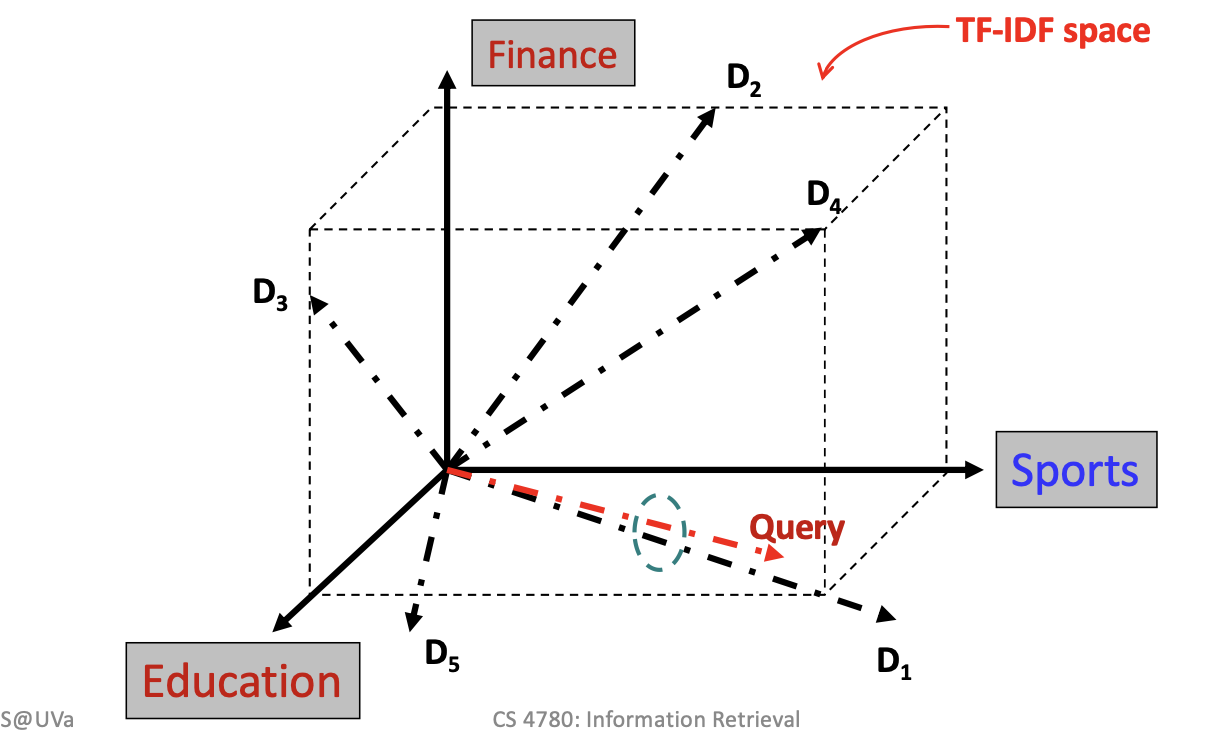

In [ ]:
# 각 축에 가중치에 의해 벡터가 정의된다!
# 좋은 similarity 는 좋은 relevance

In [ ]:
# 유클리디안 거리는 여기서는 안 좋음.
# 벡터의 모양에 방향만 차이가 있지 값에 차이가 없으면 거리를 가지고 판단하는데 그 때 유클리디안.
# 지금은 우리가 웨이트를 줘서 벡터의 모양을 바꿔버림. 그래서 유클리디안 거리를 썼을 때 어떤 문제가 발생할까?
# req 을 우리는 각 축에서의 weight 로 정의했음.

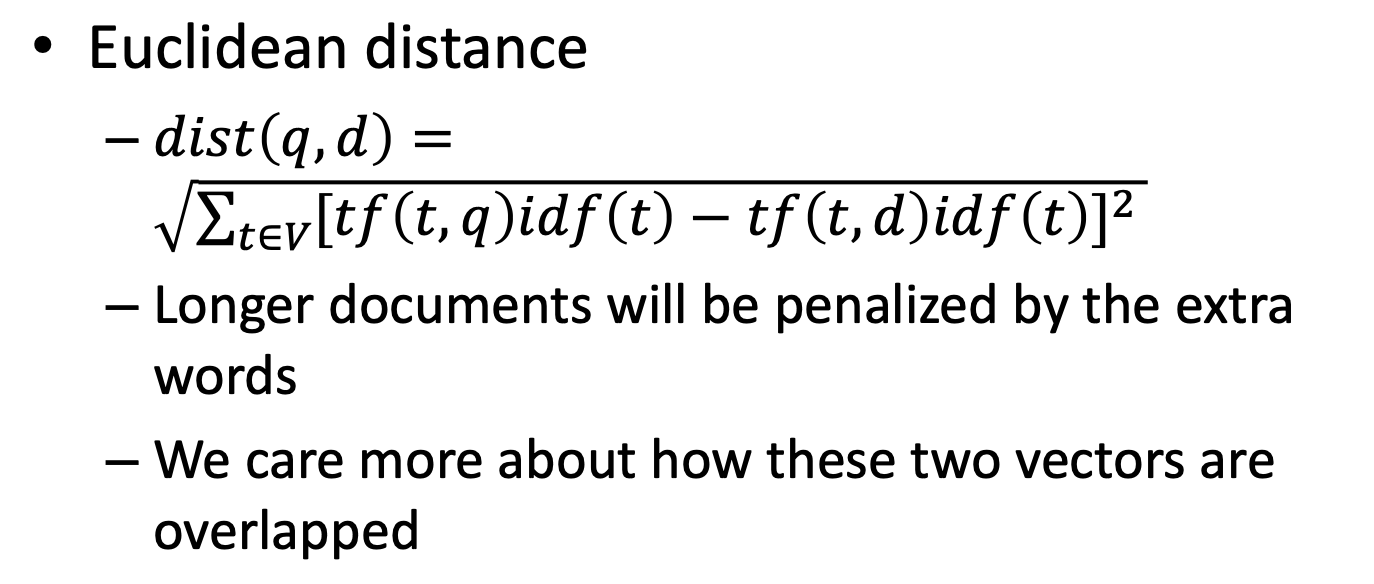

In [ ]:
# Query는 짧으니까 값이 대부분 0일 것. 그렇게 되면 longer doc 은 패널티를 받음
# 즉 Query에는 존재하지 않는데 doc에는 존재하는 애들을 지나칠 수를 없음. 제곱했기 때문.
# 그렇다면 계속 누적되고 제곱근이 구해짐. 그러면 단어가 많으면 많을수록 양수가 계속해서 더해지는 형국. 웨이트가 클수록 패널티를 받음
# 그러니 원래 query 랑 가까움에도 불구하고 거리상 수식에서 봤을 때 멀리 나옴.
# 그래서 여기서 유클리디안 거리는 좋은 measure 가 아님.

In [ ]:
# 그래서 우리는 measure 를 distance 에서 angle 로 바꿀 것.

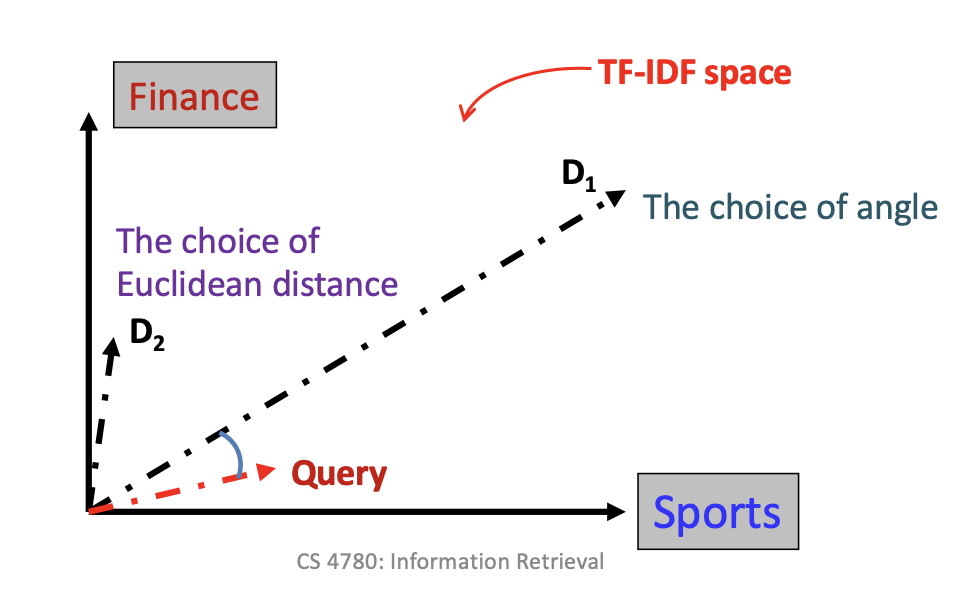

In [ ]:
# 그 앵글이 벡터의 내적을 이용한 cosine similarity => 벡터에 다른 벡터를 투영하는 것.

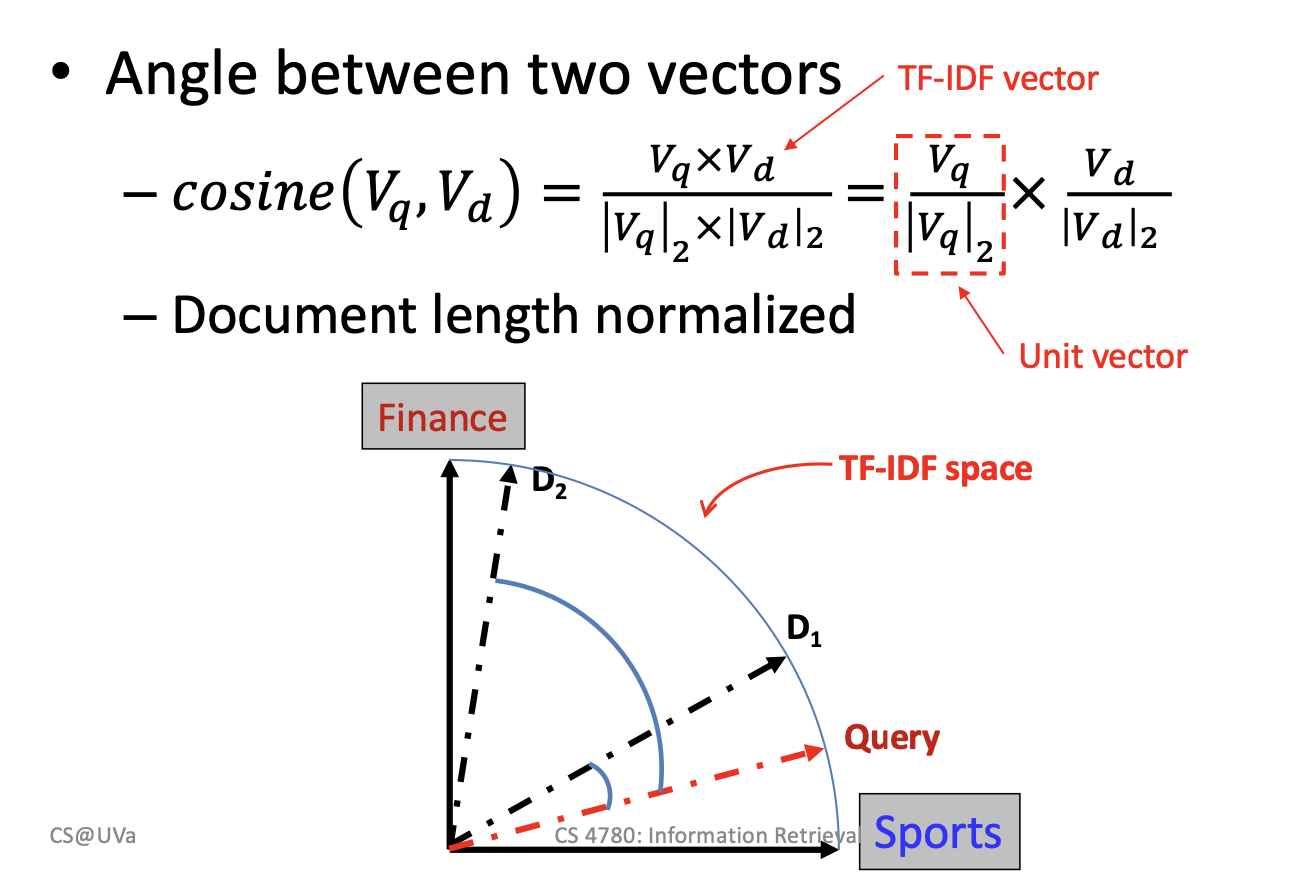

In [ ]:
# 코사인 유사도는 0-1
# 1사분면만 얘기하기 때문에 두 벡터가 가리키는 방향이 유사하다는 것은 weight 값이 비슷한 분포를 가진다는 것.
# 그것은 weight 를 빈도로 만들었기 때문에 분포되는 단어의 양상이 비슷하다는 것. -> 내용의 유사성으로 연결
# 정규화가 들어감 -> 벡터의 서로 다른 길이를 정규화.
# 그러면 방향만 가지고 판단할 수 있음. doc의 길이로 normalization 이 됨.
# doc 벡터가 query 벡터랑 곱해지면 0이 되는 값들이 많아짐.

In [ ]:
# 우리가 이 식을 구현할 줄 안다면 angle 을 가지고 cosine similarity 구할 수 있음.

In [ ]:
# 분모에 Vq 는 constant 로 취급(Query 가 들어올때마다 정해져있기 때문에 결과에 영향을 미치지 않는다!)
# 따라서 아래의 식으로 단축시킬 수 있음

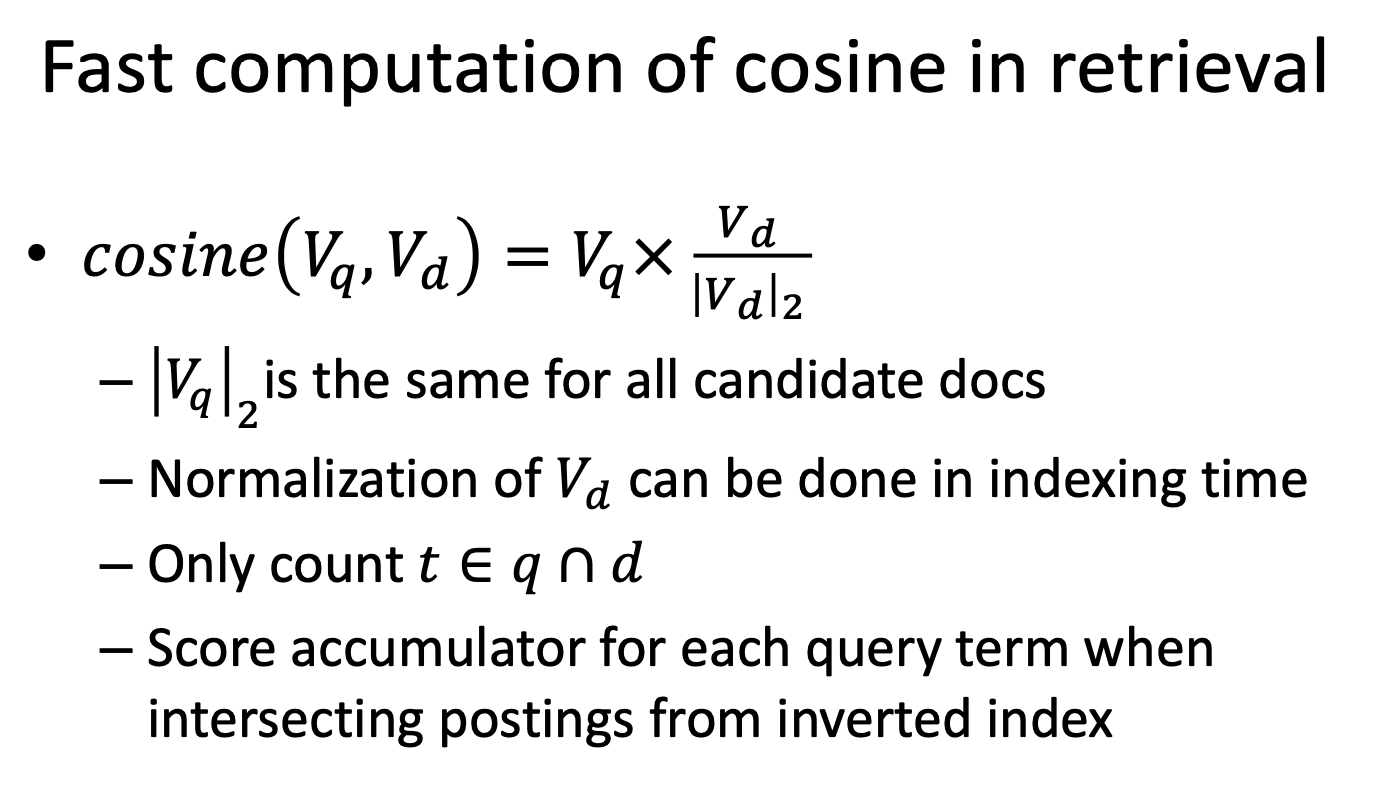

In [72]:
C  # 여기에 length 값 하나 추가해주면 됨.

[{'path': '1809896.txt', 'maxfreq': 30},
 {'path': '1809897.txt', 'maxfreq': 39},
 {'path': '1809895.txt', 'maxfreq': 12},
 {'path': '1809894.txt', 'maxfreq': 6},
 {'path': '1809890.txt', 'maxfreq': 19},
 {'path': '1809891.txt', 'maxfreq': 19},
 {'path': '1809893.txt', 'maxfreq': 19},
 {'path': '1809892.txt', 'maxfreq': 21},
 {'path': '1809899.txt', 'maxfreq': 30},
 {'path': '1809898.txt', 'maxfreq': 46}]

In [ ]:
# vector space model 가 가장 좋았음.
# 그리고 구현하기 매우 쉬움.
# 많이 연구되어져 있고 굉장히 많은 성능평가가 되어서 안정적임.
# 오늘날 여전히 많이 사용되고 있음.
# 다만 TF-IDF 가 너무 다양한 경우의 수가 있다! -> 내가 어떤 TF-IDF 를 쓸건지 결정해야되는데 경험에 의해서 결정해야 한다.

In [ ]:
# 단점도 있다.
# 독립적이라 가정했는데 실질적으로 우리가 사용하는 언어는 의존성을 가짐.
# 쿼리랑 doc의 길이는 다른데 어거지로 하나의 벡터로 만듦. 그로 인해 생기는 패널티나 손실을 무시함.
# similarity 를 계산하는 것이 과학적이지 않고 경험적이라서 임의의 것을 사용한 것.
# 굉장히 많은 파라미터를 튜닝해야 함.

# 이럼에도 불구하고 경험적으로 advantage 가 훨씬 커서 사용함.

In [ ]:
# 여기까지 해서 구현하면, 실제 검색모델이 끝남. 검색모델로서 단순히 similarity 를 구한게 아니라 vector space 를 구현했다는 것이 중요함.
# sparse 하긴 했지만, 앞으로 vector 관점에서 생각하는 능력을 길러야 함.

In [ ]:
# selection 이 boolean 임.
# 그래서 사용자가 쿼리를 쉽게 작성하고 그 쿼리에 관한 relevance 를 정의해서 ranking 을 구해준 게 요즘의 IR

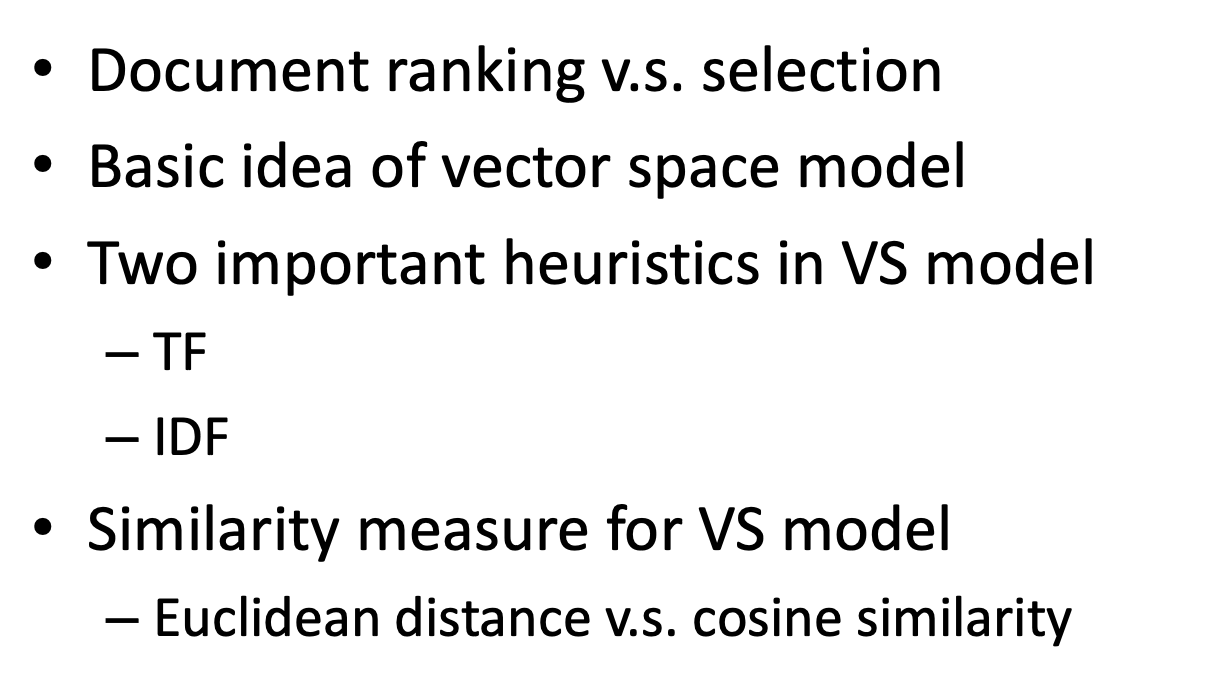

### 전체 코드

In [ ]:
# 다시 개념 정리. 코드를 보고 직관적으로 이해하자!

In [66]:
C = list()
V = list()
TDM = dict()   # in-memory
# localTDM = dict()  # doc마다 관리
# Posting = FIle # on-disc 전체 단어, 전체 문서
# localPosting  # 한 문서에서 나온 값들을 기록

# 1. Collection
for file in kobill.fileids():
    C.append({'path':file, 'maxfreq':0})
    
# 2. each Documnet => 분산처리
for d in C:
    i = C.index(d)
    localTDM = Counter(kobill.open(d['path']).read().split())  # 아직 전처리는 안하고 쓸 것
    # 이 부분이 실질적으로 MAP 하는 과정
    C[i]['maxfreq'] = max(localTDM.values())
    
    # 3. Local -> Global
    for t,f in localTDM.items():
        if t in TDM.keys():  # 기존에 다른 문서에서 한 번 이상 t이 나온 적 있는 경우
            info = (i,f,TDM[t])

        else:  # 처음 t가 나온 경우
            info = (i,f,-1)  # 처음 나왔으니까 포인터 위치가 -1
        
        # Reduce
        fp = open('posting.dat', 'ab')
        pos = fp.tell()  # 현재 위치
        fp.write(pack('iii', *info))
        fp.close()

        TDM[t] = pos
        
# 여기서 Indexer -> Inverted Index(Posting)

In [68]:
# weight 를 만들었기 때문에 이걸 가지고 계산해서 Posting 을 바꿀 것. -> 포인터 사용보다 훨씬 쉬움

WDM = dict()

for t, pos in TDM.items():
    opos = pos
    
    # df 값 기록하는 부분
    with open('posting.dat', 'rb') as fp:
        df = 0
        while pos != -1:
            fp.seek(pos)  # pos 로 이동
            info = unpack('iii', fp.read(12))
            pos = info[-1]
            df += 1
    pos = opos
    
    
    
    with open('posting.dat', 'rb') as fp:
        fp2 = open('weights.dat', 'ab')
        wpos = fp2.tell()  # 현재위치
        
        while pos != -1:
            fp.seek(pos)  # pos 로 이동
            info = unpack('iii', fp.read(12))
            pos = info[-1]
            
            w = tf6(info[1], C[info[0]]['maxfreq'])*\
            idf2(df,len(C))
            winfo = (info[0], w)
            fp2.write(pack('if',*winfo))  # 8바이트만 기록하면 됨. 데이터 공간이 적게 된다는 것.
            
        fp2.close()
        
        WDM[t] = {'pos':wpos, 'df':df}